# ANNOUNCEMENTS - 06/05/20 Office Hours

- Home page (and google doc) updated with scheduling links/info
- Recurring 1:1s cancelled for the next 2 weeks (resume 06/22/20)
- Module 2 is unlocked. Next study group is on Section 11: Combinatorics & Probability 
- Info on exporting notebook as README has been added to the project Google Doc

___

## Final Project Submission

Please fill out:
* Student name: James Irving
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [ ]:
# import  IPython.display as dp
# with open('README.md','r+', encoding='utf-8') as f:
#     dp.display(dp.Markdown(f.read()))

> ### Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# !pip install -U fsds
from fsds.imports import *


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


fsds v0.2.9 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import os,glob
display(os.listdir('zippedData'))

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
os.path.split(files[0])[-1].replace('.csv.gz','')

'imdb.title.crew'

In [6]:
DATA = {}
for file in files:
    print(file)
    key = os.path.split(file)[-1].replace('.csv.gz','').replace('tsv.gz','')
    if ".tsv" in file:
        sep='\t'
        encode = 'latin-1'#'utf-8'
    else:
        sep=','
        encode='utf-8'
    DATA[key] = pd.read_csv(file,sep=sep,encoding=encode)#,index_col=0)

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


# Preview Data

## Questions

- **Where are the gross box office numbers?**
    - rt.movie_info.
        - Key: ?
        
    - tn.movie_budgets
        - Key:
        
    - bom.movie_gross
        - Key: 
        
- **What website is that table from?**
    - What other tables are from the same source and can be joined easily?

- **What columns may require extensive pre-processing?**
    - Any Genre columns
        - `rt.movie.info.['genre']`

In [7]:
for tablename, data in DATA.items():
#     print('---'*20+'\n'+f"{tablename}:")
    try:
        display(data.head(2).style.set_caption(f"{tablename}"))
        print(len(data))
    except:
        display(data.head(2).reset_index().style.set_caption(f"{tablename}"))
    print()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,nan,"nm0175726,nm1802864"


146144



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


26517



,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,nan,nan,0
1,tt0369610,11,Jurashikku warudo,JP,nan,imdbDisplay,nan,0


331703



,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


73856



,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


606648



,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,nan,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


54432



,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"


146144



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,nan,104 minutes,nan
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


1560



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


5782



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010


3387



,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,nan,"[""The Man""]"
1,tt0111414,2,nm0398271,director,nan,nan


1028186



## Fast Forward

- Used the tmdb api to extract movie info using the ids from the tmdb.movies table

In [8]:
df = pd.read_csv("__api_results_combined.csv",parse_dates=['release_date','release_date_cert'],index_col=0)
df.reset_index(drop=True,inplace=True)
df.head()

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 20 columns):
id                                     1586 non-null int64
rating                                 1431 non-null object
release_date_cert                      1584 non-null datetime64[ns, UTC]
imdb_id                                1583 non-null object
title                                  1586 non-null object
budget                                 1586 non-null int64
release_date                           1586 non-null datetime64[ns]
revenue                                1586 non-null int64
runtime                                1583 non-null float64
original_language                      1586 non-null object
original_title                         1586 non-null object
vote_average                           1586 non-null float64
vote_count                             1586 non-null int64
poster_path                            1533 non-null object
genres_id                         

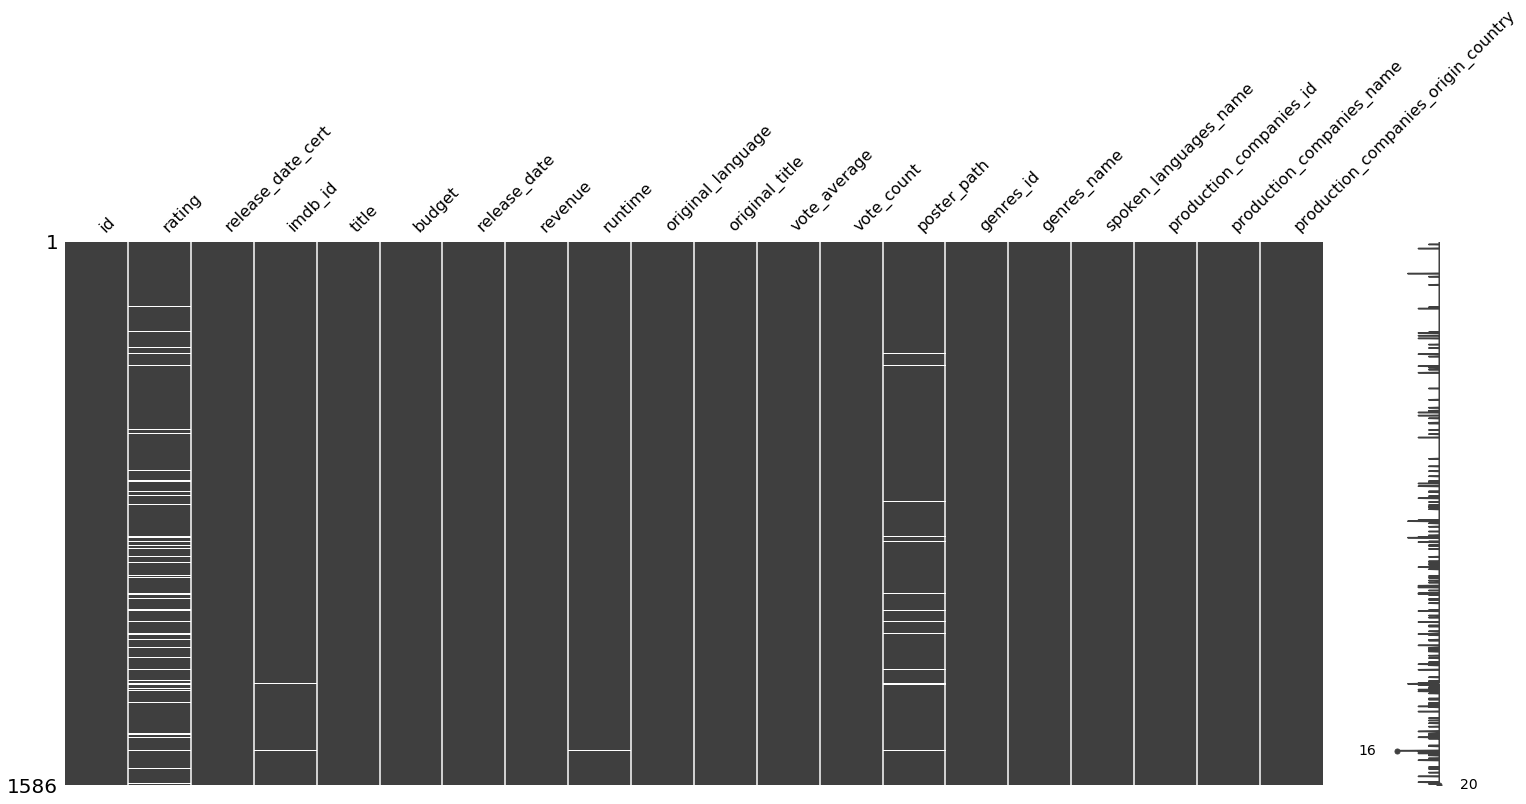

In [10]:
import missingno as ms
ms.matrix(df)

In [11]:
df.isna().sum()

id                                       0
rating                                 155
release_date_cert                        2
imdb_id                                  3
title                                    0
budget                                   0
release_date                             0
revenue                                  0
runtime                                  3
original_language                        0
original_title                           0
vote_average                             0
vote_count                               0
poster_path                             53
genres_id                                0
genres_name                              0
spoken_languages_name                    0
production_companies_id                  0
production_companies_name                0
production_companies_origin_country      0
dtype: int64

In [12]:
df.dropna(subset=['rating','imdb_id'],inplace=True)
df.isna().sum()

id                                     0
rating                                 0
release_date_cert                      0
imdb_id                                0
title                                  0
budget                                 0
release_date                           0
revenue                                0
runtime                                0
original_language                      0
original_title                         0
vote_average                           0
vote_count                             0
poster_path                            8
genres_id                              0
genres_name                            0
spoken_languages_name                  0
production_companies_id                0
production_companies_name              0
production_companies_origin_country    0
dtype: int64

In [13]:
df.reset_index(drop=True,inplace=True)
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1427,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1428,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1429,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


### Restricting Dataset to 2010+


- To provide the most helpful up-to-date recommendations, we are restricting our analysis to movies released after 2010

In [14]:
## Limit to 2010
df = df.loc[df['release_date']>='2010']
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1427,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1428,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1429,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


### Removing Undesirable Ratings

In [15]:
df['rating'].value_counts()
keep_ratings = ['G','PG','PG-13','R']

In [16]:
df = df.loc[df['rating'].isin(keep_ratings)]

In [17]:
df['rating'].value_counts()

R        641
PG-13    529
PG       192
G         16
Name: rating, dtype: int64

In [18]:
def column_report(df1,styled=False,cmap='Reds'):
    """Returns a report of the dtypes, num null, % null, and num of unique values
    """
    report = pd.DataFrame(index=df1.columns)

    report['dtype']=df1.dtypes

    report['num_null'] = df1.isna().sum()
    report['% null'] = round(df1.isna().sum()/len(df1)*100,2)

    report['nunique'] = df1.nunique()
    
    if styled:
        s = report.style.bar('% null').background_gradient(subset=['nunique'],
                                                           cmap=cmap)
        display(s)
    else:
        return report#.style.background_gradient(subset=['num_null'],cmap='Reds')


column_report(df,True)#.style.bar('% null').background_gradient(subset=['nunique'],

,dtype,num_null,% null,nunique
id,int64,0,0,1378
rating,object,0,0,4
release_date_cert,"datetime64[ns, UTC]",0,0,759
imdb_id,object,0,0,1378
title,object,0,0,1378
budget,int64,0,0,210
release_date,datetime64[ns],0,0,1005
revenue,int64,0,0,1210
runtime,float64,0,0,92
original_language,object,0,0,2


In [19]:
# plt.style.use('seaborn-talk')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


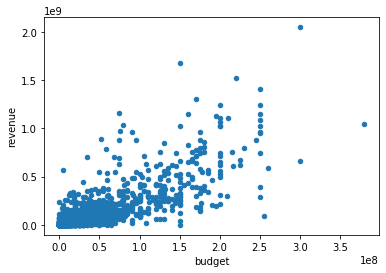

In [20]:
df.plot(kind='scatter',x='budget',y='revenue')

In [21]:
pd.set_option('display.max_columns',0)

#  📕BOOKMARK  START HERE

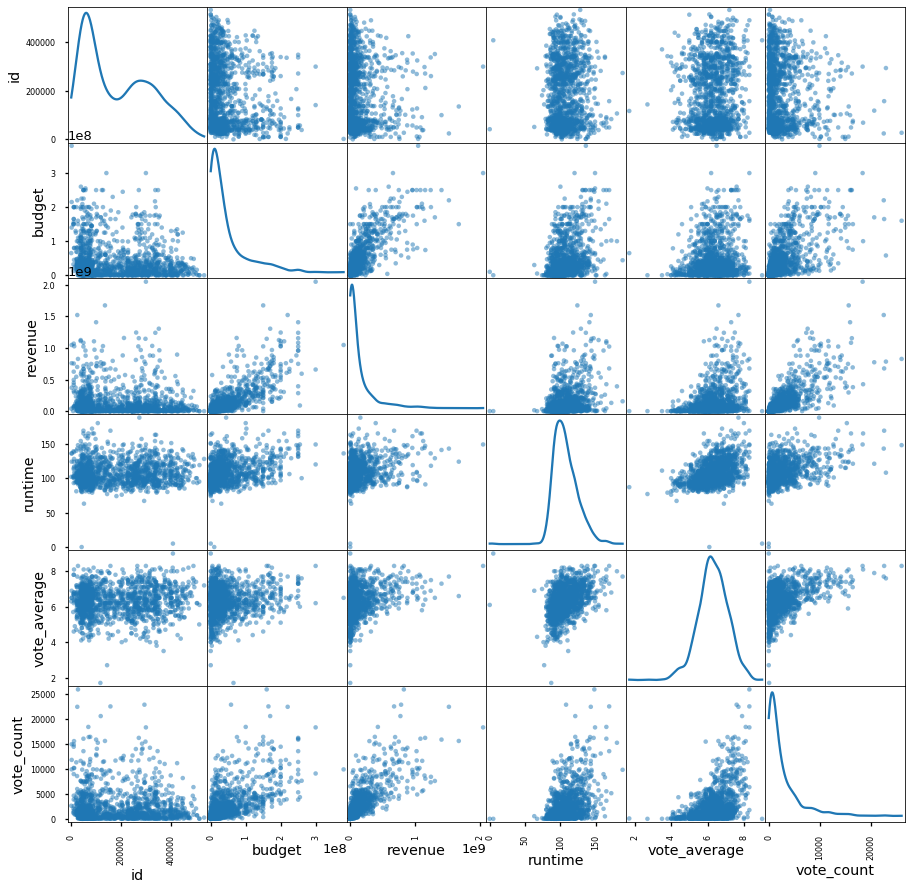

In [22]:
with plt.style.context('seaborn-talk'):

    plt.rcParams['figure.figsize'] = (15,15)
    axes = pd.plotting.scatter_matrix(df,diagonal='kde')#,c='vote_count');

In [23]:
revenue_cols = ['revenue','budget']
corr = df.corr()[['revenue']]
corr_tf = corr.apply(lambda x: np.abs(x) > 0.5)

corr.style.background_gradient(cmap='Greens').set_caption('Correlation Matrix')


,revenue
id,-0.062465
budget,0.785052
revenue,1
runtime,0.337446
vote_average,0.282399
vote_count,0.775605


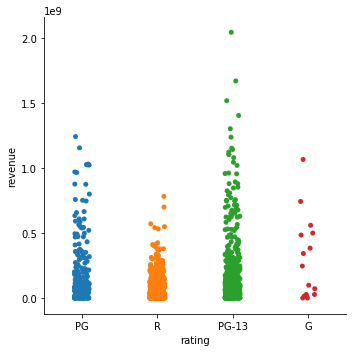

In [24]:
# df1=ratings_api.copy()
fg = sns.catplot(data=df,x='rating',y='revenue')

In [106]:
pd.eval(df['genres_name'])

AttributeError: 'PandasExprVisitor' object has no attribute 'visit_Ellipsis'

In [25]:
# df.set_index('tmdb_id',inplace=True)
# df_api.set_index('id',inplace=True)

# display(df.head(),df_api.head())

In [26]:
# df['rating'] = df_api['rating']
# df

In [27]:
df.groupby('rating').get_group('G')

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
15,10193,G,2010-06-17 00:00:00+00:00,tt0435761,Toy Story 3,200000000,2010-06-16,1066969703,103.0,en,Toy Story 3,7.8,10198,/a83hHwstUsEEjE55kTgDkZMFweR.jpg,"[16, 10751, 35]","['Animation', 'Family', 'Comedy']","['English', 'Español']",[3],['Pixar'],['US']
46,38843,G,2010-07-23 00:00:00+00:00,tt0493949,Ramona and Beezus,15000000,2010-07-23,27293743,103.0,en,Ramona and Beezus,6.4,540,/r9HUYkHyBgGIgqn9FZKBW4zGsYd.jpg,"[35, 10751]","['Comedy', 'Family']",['English'],"[444, 813]","['Dune Entertainment', 'Di Novi Pictures']","['US', 'US']"
234,49013,G,2011-06-16 00:00:00+00:00,tt1216475,Cars 2,200000000,2011-06-11,559852396,106.0,en,Cars 2,5.9,4895,/okIz1HyxeVOMzYwwHUjH2pHi74I.jpg,"[16, 10751, 12, 35]","['Animation', 'Family', 'Adventure', 'Comedy']","['English', '日本語', 'Italiano', 'Français']","[3, 2]","['Pixar', 'Walt Disney Pictures']","['US', 'US']"
253,49953,G,2011-03-25 00:00:00+00:00,tt1230204,A Turtle's Tale: Sammy's Adventures,0,2010-08-03,71594792,88.0,en,A Turtle's Tale: Sammy's Adventures,5.8,391,/rKzBoLWJX1Ku2BPiT2OQqoSLBxl.jpg,"[16, 10751]","['Animation', 'Family']",['English'],"[1991, 10159, 10160]","['Motion Investment Group', 'nWave Pictures', ...","['BE', 'BE', 'US']"
430,46195,G,2011-04-15 00:00:00+00:00,tt1436562,Rio,90000000,2011-04-03,484635760,96.0,en,Rio,6.6,4342,/6qCgledQWttNg3EKpts8RYes74r.jpg,"[16, 12, 35, 10751]","['Animation', 'Adventure', 'Comedy', 'Family']","['English', 'Português']","[9383, 11749, 25]","['Blue Sky Studios', '20th Century Fox Animati...","['US', 'US', 'US']"
445,51162,G,2011-07-14 00:00:00+00:00,tt1449283,Winnie the Pooh,30000000,2011-04-13,14460000,63.0,en,Winnie the Pooh,6.9,536,/9T8emBz4BqhahoAuhcOU9X2y0IQ.jpg,"[16, 10751]","['Animation', 'Family']",['English'],"[6125, 2]","['Walt Disney Animation Studios', 'Walt Disney...","['US', 'US']"
446,62211,G,2013-06-21 00:00:00+00:00,tt1453405,Monsters University,200000000,2013-06-20,743559607,104.0,en,Monsters University,7.0,7423,/y7thwJ7z5Bplv6vwl6RI0yteaDD.jpg,"[16, 10751]","['Animation', 'Family']",['English'],"[3, 2]","['Pixar', 'Walt Disney Pictures']","['US', 'US']"
471,44010,G,2010-09-10 00:00:00+00:00,tt1483010,Logan,135000,2010-09-10,10474,94.0,en,Logan,6.1,6,NaN,"[35, 18, 10751]","['Comedy', 'Drama', 'Family']",['English'],"[16726, 16727, 16728]","['logan films', 'Real Bean Entertainment', 'Av...","['', '', '']"
476,172391,G,2013-12-07 00:00:00+00:00,tt1487931,Khumba,20000000,2013-07-18,27187375,85.0,en,Khumba,5.7,163,/7RXXQxM4ZlmoiqQD053k8GFyegR.jpg,"[16, 12, 10751]","['Animation', 'Adventure', 'Family']",['English'],[23953],['Triggerfish Animation Studios'],['ZA']
477,133931,G,2012-07-07 00:00:00+00:00,tt1488181,Zambezia,20000000,2012-06-05,0,83.0,en,Zambezia,5.7,159,/7aJl440TlbyqthklVrvCnSbjKYe.jpg,"[35, 16, 12, 10751]","['Comedy', 'Animation', 'Adventure', 'Family']",['English'],"[25032, 10884, 25033, 564, 25034, 5113, 23953]","['Cinema Management Group', 'The Department of...","['', '', '', '', '', 'US', 'ZA']"


## SAVING FINAL DF

In [28]:
df.to_csv("__FINAL_MOVIES_DATASET.csv",index=False)

In [29]:
df = pd.read_csv('__FINAL_MOVIES_DATASET.csv',
                 parse_dates=['release_date_cert','release_date'])
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1374,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


In [30]:
df.isna().sum()

id                                     0
rating                                 0
release_date_cert                      0
imdb_id                                0
title                                  0
budget                                 0
release_date                           0
revenue                                0
runtime                                0
original_language                      0
original_title                         0
vote_average                           0
vote_count                             0
poster_path                            3
genres_id                              0
genres_name                            0
spoken_languages_name                  0
production_companies_id                0
production_companies_name              0
production_companies_origin_country    0
dtype: int64

## Formatting $Millions

# Q1: Is a higher budget correlated with revenue?

In [31]:
# df['revenue'].describe().round(3)

In [32]:
def billions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.1fB' % (x * 1e-9)

def millions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.0f M' % (x * 1e-6)

formatterM = mpl.ticker.FuncFormatter(millions)
formatterB = mpl.ticker.FuncFormatter(billions)

In [33]:
# def millions(x, pos):
#     '''The two args are the value and tick position;
#     From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
#     # Ref https://www.w3schools.com/python/ref_string_format.asp
#     return '$ %1.0fM' % (x * 1e-6)

# formatter = mpl.ticker.FuncFormatter(millions)

In [34]:
plt.style.available

['_classic_test_patch',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [35]:
plt.style.use('seaborn-poster')

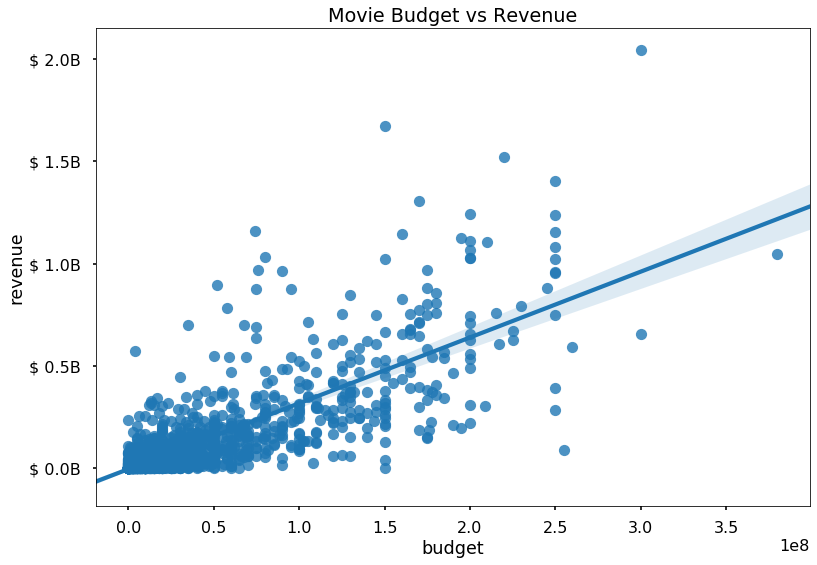

In [36]:
with plt.style.context('seaborn-poster'):
    ax = sns.regplot(data=df,x='budget',y='revenue')
    ax.yaxis.set_major_formatter(formatterB)
    ax.set_title('Movie Budget vs Revenue')

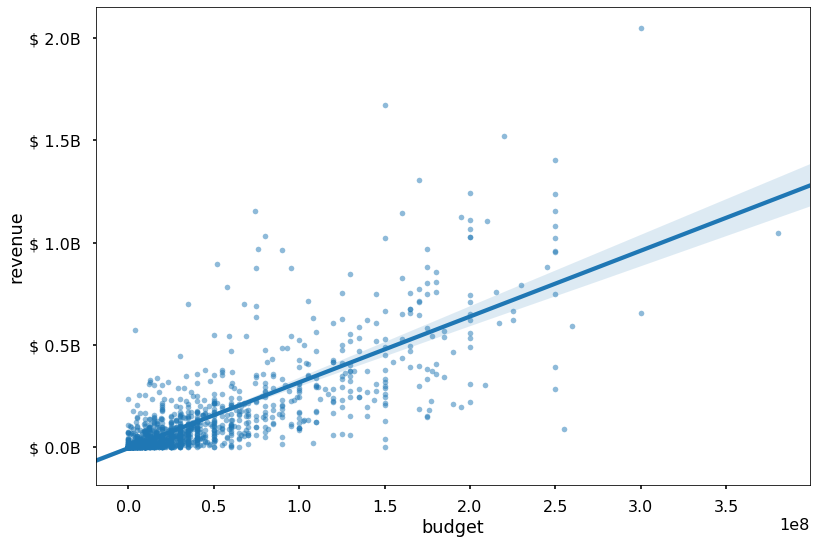

In [37]:
ax = sns.regplot(data=df,x='budget',y='revenue',marker='.',
                 scatter_kws=dict(alpha=0.5))
ax.yaxis.set_major_formatter(formatterB)

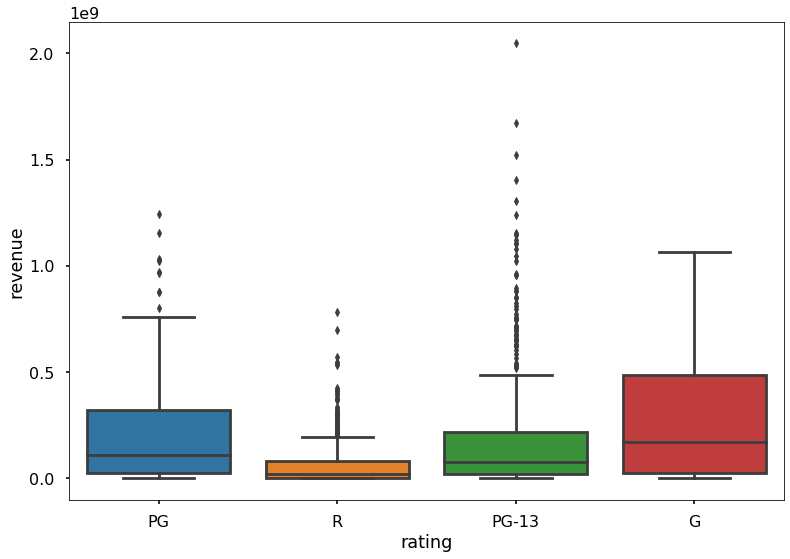

In [38]:
sns.boxplot(data=df,x='rating',y='revenue')

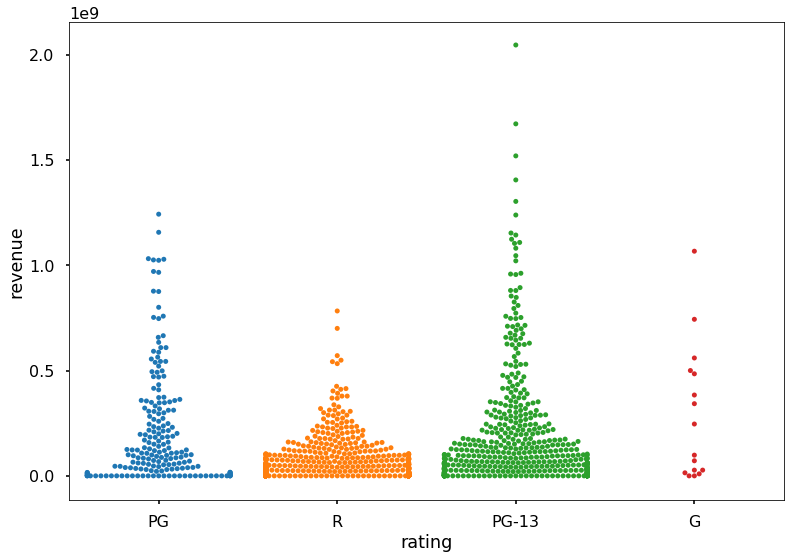

In [39]:
sns.swarmplot(data=df,x='rating',y='revenue')

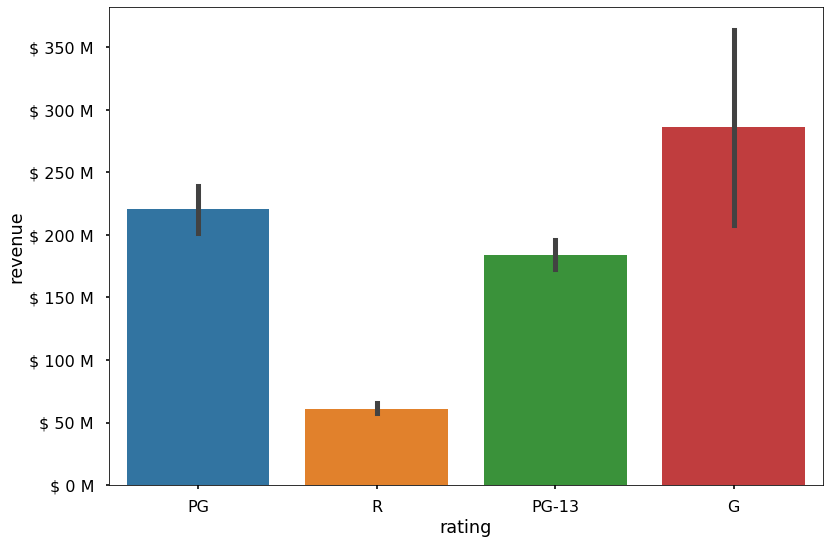

In [40]:
ax = sns.barplot(data=df,x='rating',y='revenue',ci=68)
ax.yaxis.set_major_formatter(formatterM)

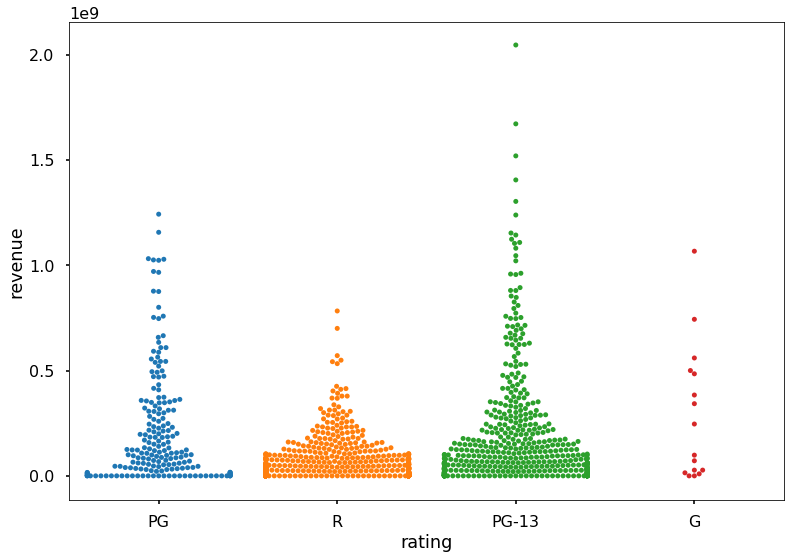

In [41]:
sns.swarmplot(data=df,x='rating',y='revenue')#,ci=68)

# GENRES

In [42]:
df

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1374,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 20 columns):
id                                     1378 non-null int64
rating                                 1378 non-null object
release_date_cert                      1378 non-null datetime64[ns, UTC]
imdb_id                                1378 non-null object
title                                  1378 non-null object
budget                                 1378 non-null int64
release_date                           1378 non-null datetime64[ns]
revenue                                1378 non-null int64
runtime                                1378 non-null float64
original_language                      1378 non-null object
original_title                         1378 non-null object
vote_average                           1378 non-null float64
vote_count                             1378 non-null int64
poster_path                            1375 non-null object
genres_id                         

In [44]:
df_genre = df.copy()
df_genre = df_genre.explode('genres_name')
df_genre

,id,rating,release_date_cert,imdb_id,title,budget,release_date,revenue,runtime,original_language,original_title,vote_average,vote_count,poster_path,genres_id,genres_name,spoken_languages_name,production_companies_id,production_companies_name,production_companies_origin_country
0,116977,PG,2013-05-07 00:00:00+00:00,tt0249516,Foodfight!,65000000,2012-06-15,73706,87.0,en,Foodfight!,1.7,76,/R1zn75Yz4wpdd85byqhP7mT6No.jpg,"[16, 28, 35, 10751]","['Animation', 'Action', 'Comedy', 'Family']",['English'],"[4174, 1632, 133802, 133803, 133804]","['Threshold Entertainment', 'Lionsgate', 'C47 ...","['', 'US', '', '', '']"
1,308024,R,2015-01-23 00:00:00+00:00,tt3844362,The Overnight,0,2015-06-19,1100000,80.0,en,The Overnight,6.0,222,/65L466UR3h1jw8mTJhGmMZlj0eT.jpg,"[9648, 35]","['Mystery', 'Comedy']","['English', 'Français']","[1974, 63631]","['Duplass Brothers Productions', ""Gettin' Rad ...","['US', '']"
2,83770,R,2012-12-21 00:00:00+00:00,tt0337692,On the Road,25000000,2012-05-22,8784318,137.0,en,On the Road,5.6,600,/k7LQteD02p3VHixbS6NXHkFdFwT.jpg,"[12, 18]","['Adventure', 'Drama']","['English', 'Français']","[8372, 70, 79077, 614, 83, 10611, 346, 21914, ...","['SPAD Films', 'American Zoetrope', 'Jerry Lei...","['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA..."
3,116745,PG,2013-12-25 00:00:00+00:00,tt0359950,The Secret Life of Walter Mitty,90000000,2013-12-18,188133322,114.0,en,The Secret Life of Walter Mitty,7.1,5561,/tY6ypjKOOtujhxiSwTmvA4OZ5IE.jpg,"[12, 35, 18, 14]","['Adventure', 'Comedy', 'Drama', 'Fantasy']",['English'],"[290, 22213, 9118, 12, 10893, 37336, 25, 2932]","['Ingenious Media', 'TSG Entertainment', 'Samu...","['GB', 'US', 'US', 'US', '', '', 'US', 'US']"
4,169917,R,2014-09-19 00:00:00+00:00,tt0365907,A Walk Among the Tombstones,28000000,2014-09-18,53181600,113.0,en,A Walk Among the Tombstones,6.3,1926,/bQTHTZezSudf27mMQtedHf1XpgO.jpg,"[80, 18, 9648, 53]","['Crime', 'Drama', 'Mystery', 'Thriller']",['English'],"[39043, 216, 40106, 11448, 10246, 8532, 40107,...","['Traveling Picture Show Company (TPSC)', 'Jer...","['', '', '', 'US', 'US', '', '', '']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,487558,R,2018-08-10 00:00:00+00:00,tt7349662,BlacKkKlansman,15000000,2018-07-30,48686605,135.0,en,BlacKkKlansman,7.6,4633,/8jxqAvSDoneSKRczaK8v9X5gqBp.jpg,"[80, 18, 36, 35]","['Crime', 'Drama', 'History', 'Comedy']",['English'],"[3172, 72725, 923, 88934, 4319]","['Blumhouse Productions', 'QC Entertainment', ...","['US', 'US', 'US', 'US', 'US']"
1374,476968,PG-13,2018-03-28 00:00:00+00:00,tt7388562,"Paul, Apostle of Christ",5000000,2018-03-23,22525668,108.0,en,"Paul, Apostle of Christ",6.8,123,/2NUXG94dGMKYgJL1BkJGKynMb3l.jpg,[36],['History'],"['Español', 'English']","[81520, 10156, 105388]","['Outside Da Box', 'Affirm Films', 'ODB Films']","['', 'US', '']"
1375,491418,PG-13,2019-03-05 00:00:00+00:00,tt7401588,Instant Family,48000000,2018-11-16,14700000,118.0,en,Instant Family,7.5,1437,/dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg,"[35, 18]","['Comedy', 'Drama']",['English'],"[8537, 4, 119509]","['Closest to the Hole Productions', 'Paramount...","['US', 'US', 'US']"
1376,493922,R,2018-09-04 00:00:00+00:00,tt7784604,Hereditary,10000000,2018-06-07,79336821,127.0,en,Hereditary,7.1,3950,/lHV8HHlhwNup2VbpiACtlKzaGIQ.jpg,"[27, 9648, 53]","['Horror', 'Mystery', 'Thriller']",['English'],[24277],['PalmStar Media'],['US']


In [45]:
df['genre']

KeyError: 'genre'

In [ ]:
# df= pd.read_csv('best_combined_movies.csv',index_col=0)
# df

In [ ]:
combined = ','.join(df['genres'])
all_genres = list(set(combined.split(',')))
all_genres

In [ ]:
all_genres = ','.join(df['genres']).split(',')
all_genres = list(set(all_genres))
all_genres

In [ ]:
genre_df = pd.DataFrame()
for genre in all_genres:
    genre_df[genre] = df['genres'].str.contains(genre).astype(int)

In [ ]:
genre_df

In [ ]:
df =pd.concat([df,genre_df],axis=1)
df

In [ ]:
genre_dfs = {}
for genre in all_genres:
    genre_dfs[genre] = df.groupby(genre).get_group(1)
    

In [ ]:
genre_dfs.keys()

In [ ]:
genre_dfs['Crime']

In [ ]:
profit_cols = ['domestic_gross','production_budget','worldwide_gross']

plot_dict={}

for col in profit_cols:
    plot_dict[col] = {}
    
    for genre,genre_df in genre_dfs.items():
        plot_dict[col][genre] = genre_df[col].reset_index()

plot_dict.keys()

In [ ]:
plot_dict['domestic_gross'].keys()

In [ ]:
# pd.DataFrame(plot_dict['domestic_gross'],index=[0])

In [ ]:
# domestic = pd.DataFrame.from_dict(plot_dict['domestic_gross'])
# domestic.sum().plot(kind='barh')

In [ ]:
# domestic

In [ ]:
# sns.barplot(data=domestic,orient='h',ci=68)

In [ ]:
# ax = sns.catplot(data=domestic,aspect=2)
# ax
# ax.set_xticklabels(ax.get_xticklabels(),ha='right',rotation=45)

In [ ]:
sns.lmplot('production_budget','domestic_gross',df)#,hue='')

# OLD

### Plotly Express

In [ ]:
## Visua
import plotly.express as px
px.scatter(df,y='domestic_gross',x='production_budget',hover_name='movie',
           hover_data=['domestic_gross','production_budget'],trendline='ols')
# px.scatter(df1,y='domestic_gross',
#          x='rating',
#          color='rating')#

In [ ]:
import plotly.express as px
# px.scatter(df1,y='domestic_gross',x='runtime',hover_name='movie',
#            hover_data=['domestic_gross','production_budget'],
#        color='rating',trendline='ols')
# # px.scatter(df1,y='domestic_gross',
# #          x='rating',
# #          color='rating')#

In [ ]:
# DATA['tn.movie_budgets']

## Aligning The Data

- Make a dictionary of column name to use as key for each dataframe stored in DATA

<details >
    <summary style="font-size:1.1em;background-color:lightblue;width:80%;text-align:center;                   "> Key Columns</summary>    
    
```python
KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}
```


In [ ]:
# # keys = list(DATA.keys())

# KEY_COLS = {'imdb.title.crew': 'tconst', 
#         'tmdb.movies': 'id',
#         'imdb.title.akas': 'title_id',
#         'imdb.title.ratings': 'tconst',
#         'imdb.name.basics': 'nconst',
#         'rt.reviews.': 'id',
#         'imdb.title.basics': 'tconst',
#         'rt.movie_info.': 'id',
#         'tn.movie_budgets': 'id',
#         'bom.movie_gross': 'title',
#         'imdb.title.principals': 'tconst'}

In [ ]:
# DATA['imdb.title.principals']

In [ ]:
# unique_tconst = {}
# for table_name,key_col in KEY_COLS.items():
#     table = DATA[table_name]
#     print(table_name)
# #     print(key_col)

#     if 'tconst' in key_col:
#         print(key_col)
#         print()

#         unique_tconst[table_name] = table[key_col].unique()
#     else:
#         print('N/A')
        
#     print()


In [ ]:
# unique_tconst

In [ ]:
[len(v) for x,v in unique_tconst.items()]

In [ ]:
matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])==146144 ]
matching_key_cols

In [ ]:
df_imdb = pd.merge(DATA['imdb.title.crew'],DATA['imdb.title.basics'],
                   how='outer',suffixes=('crew','basics') )
df_imdb

In [ ]:
non_matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])!=146144 ]
non_matching_key_cols

In [ ]:
[DATA[x].shape for x in non_matching_key_cols] 

### Notes: COLUMNNS OF INTEREST
    - "averagerating"(imdb.ratings)

In [ ]:
display(DATA[non_matching_key_cols[0]],DATA[non_matching_key_cols[1]])

In [ ]:
df_imdb

In [ ]:
DATA['imdb.title.ratings']

In [ ]:
df = pd.merge(df_imdb, DATA['imdb.title.ratings'],on='tconst',how='outer')
df

In [ ]:
df.info()

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]

In [ ]:
scatmat = pd.plotting.scatter_matrix(df);

In [ ]:
import missingno as ms
ms.matrix(df)

In [ ]:
df[df['runtime_minutes'].isna()].isna().sum()

In [ ]:
rated = df[df['averagerating'].notnull()].copy()
rated

In [ ]:
scatmat = pd.plotting.scatter_matrix(rated);

In [ ]:
import seaborn as sns
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
sns.boxplot(x='start_year',y='runtime_minutes',data=rated)

In [ ]:
import scipy.stats as st

rated['runtime_minutes']

In [ ]:
rated.isna().sum()/len(rated)

In [ ]:
rated.dropna(inplace=True)

In [ ]:
idx_outs = np.abs(st.zscore(rated['runtime_minutes'])) >3
idx_outs.sum()

In [ ]:
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
rated['outlier'] = idx_outs

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated,hue='outlier')

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated[~idx_outs],hue='outlier')

In [ ]:
# stop

# Joining dfrt (gross) + df_imdb

In [ ]:
dfrt.head()

In [ ]:
df.head()

# Using Movie DataBase API
- https://rapidapi.com/rapidapi/api/movie-database-imdb-alternative/details

In [ ]:
stop

In [ ]:
df = DATA['tn.movie_budgets']
df

In [ ]:
df['movie']

In [ ]:
import requests

def get_mdb_api(query,query_params={}):
    """Submits a query using Movie DataBase"""
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"r":"json","s":query,**query_params}

    headers = {
        'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com",
        'x-rapidapi-key': "1ef8e1baa6msh959ec491b7e59fcp1c32b8jsn7c8644b514b1"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response

def make_records_df(response):
    """Takes response from get_mdb_api (or the response.json()) and extracts
    the search results to return as a df"""
    if not isinstance(response,dict):
        r = response.json()
    else:
        r = response
    records = r['Search']
    return pd.DataFrame.from_records(records)
#     print(response.text)

In [ ]:
resp = get_mdb_api('Dark Phoenix')

In [ ]:
make_records_df(resp)

### Testing with 1 Movie

In [ ]:
test_movie = df.loc[df['movie']=='Avatar']
test_movie

In [ ]:
test = get_mdb_api(test_movie['movie'])
test

In [ ]:
resp = test.json()
resp

In [ ]:
resp.keys()

In [ ]:
res_df = pd.DataFrame.from_records(resp['Search'])
res_df

In [ ]:
test_movie.T[0]

In [ ]:
test_movie['movie']

In [ ]:
res_df['Title']

In [ ]:
## Check which result matches 
matches = res_df['Title'].isin(test_movie['movie'])
res_df[matches]

In [ ]:
test_movie